In [1]:
import sys
import os
sys.path.append('/home/yutanagano/Projects/tcr_embedder')
os.chdir('/home/yutanagano/Projects/tcr_embedder')

In [2]:
import json
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import seaborn

seaborn.set_theme()
seaborn.set_style('white')

In [3]:
BENCHMARKING_PARENT_DIR = Path('benchmarks')

In [4]:
metric_dicts = [
    {
        'model_name': 'random_guess',
        '5nn_accuracy': 1/48
    }
]

for model in BENCHMARKING_PARENT_DIR.iterdir():
    with open(model/'metrics.json', 'r') as f:
        metric_dicts.append(json.load(f))

In [5]:
metrics = pd.DataFrame(metric_dicts)
metrics = metrics.sort_values(by='5nn_accuracy', ignore_index=True)

In [6]:
metrics

,model_name,5nn_accuracy,alignment,uniformity,alignment + uniformity
0,random_guess,0.020833,NaN,NaN,NaN
1,random_embedder_4,0.113750,1.118467,-1.139765,-0.021298
2,random_embedder_2,0.119375,0.601325,-0.681504,-0.080180
3,atchley_embedder,0.122083,0.972870,-0.980380,-0.007510
4,random_embedder_0,0.126667,0.654111,-0.753785,-0.099674
5,random_embedder_3,0.128958,0.785866,-0.876657,-0.090791
6,random_embedder_1,0.132500,0.882768,-0.929465,-0.046697
7,CDR3BERT_ac_6_128_8_512-embed_5,0.237917,0.605934,-0.698529,-0.092595
8,cdr3_levenshtein,0.283542,NaN,NaN,NaN
9,CDR3BERT_acp_6_128_8_512-embed_5,0.286875,0.753471,-0.805676,-0.052205


In [7]:

def collapse_names(name):
    groups = (
        'AutoContrastive_AULoss',
        'AutoContrastive_SimCLoss',
        'CDR3BERT_acp',
        'CDR3BERT_ac',
        'random_embedder'
    )

    for group in groups:
        if group in name:
            return group
    
    return name

metrics['model_name'] = metrics['model_name'].map(collapse_names)

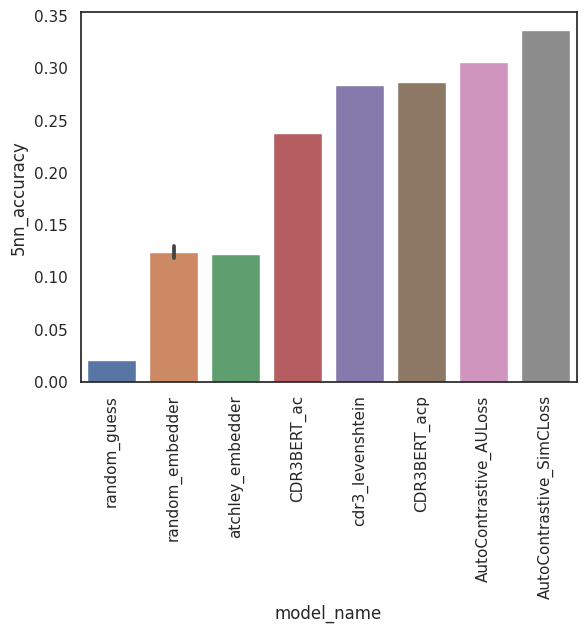

In [8]:
knn_acc_plot = seaborn.barplot(metrics, x='model_name', y='5nn_accuracy')
knn_acc_plot.set_xticklabels(knn_acc_plot.get_xticklabels(), rotation=90)
plt.show()

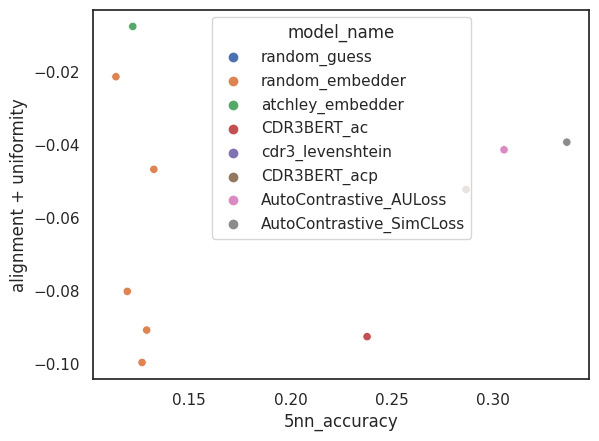

In [9]:
scatter_model_names = seaborn.scatterplot(metrics, x='5nn_accuracy', y='alignment + uniformity', hue='model_name')
plt.show()